# 3.2 BENCHMARK MNIST 
Hacer un comparativo para el benchmark de visión computacional MNIST entre una RNA clásica (usando sci-kit learn) y una profunda (usando Keras y TensorFlow) 

## RED NEURONAL CLASICA (Scikit Learn)

Se importan las librerías necesarias para poder trabajar la red neuronal de Scikit Learn y contar el tiempo que pasa en cada proceso.

In [1]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
import pickle

Se leen los datos guardados en el csv y se aclara que los separe dependiendo de las comas, estos mismos los declara como entradas y salidas

In [2]:
data = np.loadtxt('mnist_train.csv', delimiter=',') 
ncol = data.shape[1]
X = data[:,1:ncol]
y = data[:,0]

Se entrenan los datos con el modelo de regresión logística metiendo los datos que anteriormente declaramos, tomamos el transcurso del tiempo que hubo en este proceso y lo imprimimos

In [3]:
tiempo1 = time.process_time()
clf = LogisticRegression()
clf.fit(X, y)
tiempo2 = time.process_time()
print("Tiempo de procesador para el entrenamiento (seg):")
print(tiempo2 - tiempo1)

Tiempo de procesador para el entrenamiento (seg):
53.5625


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se lee ahora datos de datos entrenados y se definen como entradas y salidas.

In [4]:
data = np.loadtxt('mnist_test.csv', delimiter=',') 
ncol = data.shape[1]
X_test = data[:,1:ncol]
y_test = data[:,0]

Se predicen los valores utilizando la información

In [5]:
predicted = clf.predict(X_test)

Se calcula el error

In [6]:
error = 1 - accuracy_score(y_test, predicted)
print(error)

0.07450000000000001


Se guarda el modelo entrenado para futuros trabajos

In [7]:
# el modelo entrenado se salva en disco
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## RED NEURONAL PROFUNDA

### IMPORTACIONES

Se importan las librerías necesarias para la red neuronal, se establece una semilla para los numeros aleatorios así de esta manera no cambia el resultado y lo mantenemos consistente

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

### DATOS 

Se preparan los datos para que comencemos a trabajar

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Tenemos 60000 imagenes de 28x28 y tenemos 10000 para el testeo

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### VISUALIZANDO EJEMPLOS 



Visualizamos algunos ejemplos para ver que clase de datos estamos trabajando.

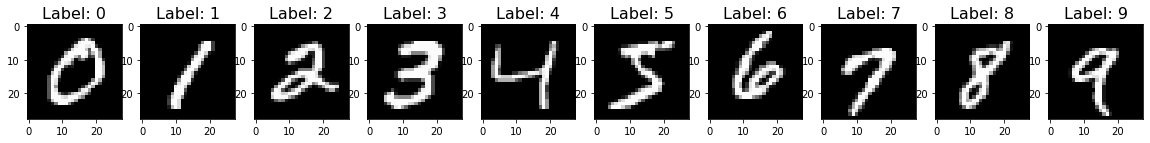

In [11]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [12]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Vamos a decodificar para que los datos no sean continuos y se pueda utilizar en el modelo de clasificación donde solo pueda ser un solo numero y dos al mismo tiempo

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### PREPARANDO DATOS 



Normalizando los datos el 255 es debido a la cantidad de colores que puede tomar

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Remodelando los datos

In [16]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


### CREANDO EL MODELO NEURONAL 


Creamos un modelo de red neuronal haciendo un modelo secuencial, con keras puedes agregar capa tras capa. Observamos al final las caracteristicas de este modelo

In [17]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### ENTRENAMIENTO 

In [18]:
batch_size = 512
epochs=10
tiempo1 = time.process_time()
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
tiempo2 = time.process_time()


Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.6007 - accuracy: 0.8204
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2231 - accuracy: 0.9349
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1614 - accuracy: 0.9525
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1286 - accuracy: 0.9623
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1063 - accuracy: 0.9689
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0895 - accuracy: 0.9732
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0752 - accuracy: 0.9777
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0569 - accuracy: 0.9827
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9855

### TIEMPO DE PROCESADO 


In [19]:
print("Tiempo de procesador para el entrenamiento (seg):")
print(tiempo2 - tiempo1)

Tiempo de procesador para el entrenamiento (seg):
26.734375


### EVALUANDO

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 707us/step - loss: 0.0701 - accuracy: 0.9793
Test Loss: 0.07006539404392242, Test Accuracy: 0.9793000221252441


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[3.0330514e-06 4.7727067e-06 9.5484444e-05 ... 9.9967277e-01
  3.2841865e-06 2.9281464e-05]
 [6.6221730e-07 5.5429118e-06 9.9997473e-01 ... 2.5868332e-09
  1.6685517e-05 3.4708674e-09]
 [2.3986711e-06 9.9865049e-01 9.6846161e-05 ... 9.6507336e-04
  6.6784567e-05 2.6736868e-06]
 ...
 [3.1148117e-10 9.6318004e-08 3.5523602e-09 ... 1.6771899e-06
  1.3618191e-07 5.2038367e-06]
 [4.6047796e-07 8.8260089e-07 1.9006196e-08 ... 2.9601316e-07
  8.8550376e-05 1.8269507e-08]
 [8.2972829e-09 1.8389534e-10 2.6650075e-09 ... 5.9057190e-11
  2.5721782e-09 1.7796621e-12]]
[7 2 1 ... 4 5 6]


# COMPARACIÓN ENTRE TIEMPOS 

Podemos observar entonces que el metodo utilizando Tensorflow lográ ser mucho más rápido y eficiente a comparación de SciKit Learn. Teniendo una diferencia de casi 40 segundos.